In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras import backend as k
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from keras.preprocessing import image
from keras.applications import imagenet_utils
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras import Sequential

In [14]:
train_path = 'Desktop/chest_xray/train'
valid_path = 'Desktop/chest_xray/val'
test_path = 'Desktop/chest_xray/test'

In [15]:
train_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path, target_size = (224,224), batch_size = 5)
valid_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path, target_size = (224,224), batch_size = 5)
test_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path, target_size = (224,224), batch_size = 5, shuffle = False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 620 images belonging to 2 classes.


In [16]:
from tensorflow.keras.applications.vgg16 import VGG16

In [17]:
vgg16_model = VGG16()

In [18]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [19]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [21]:
model.pop()

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [23]:
for layer in model.layers:
    layer.trainable = False

In [24]:
model.add(Dense(2,activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [26]:
model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data = valid_batches, validation_steps = 4, epochs = 50, verbose = 2)

Epoch 1/50
4/4 - 6s - loss: 0.5260 - accuracy: 0.7000 - val_loss: 0.6798 - val_accuracy: 0.5000
Epoch 2/50
4/4 - 5s - loss: 0.3828 - accuracy: 0.8500 - val_loss: 1.0243 - val_accuracy: 0.5000
Epoch 3/50
4/4 - 5s - loss: 0.5783 - accuracy: 0.6500 - val_loss: 0.5445 - val_accuracy: 0.8125
Epoch 4/50
4/4 - 5s - loss: 0.6105 - accuracy: 0.6000 - val_loss: 0.5279 - val_accuracy: 0.8125
Epoch 5/50
4/4 - 5s - loss: 0.5101 - accuracy: 0.6000 - val_loss: 0.9681 - val_accuracy: 0.5000
Epoch 6/50
4/4 - 6s - loss: 0.4390 - accuracy: 0.7500 - val_loss: 0.6796 - val_accuracy: 0.5625
Epoch 7/50
4/4 - 5s - loss: 0.5282 - accuracy: 0.7500 - val_loss: 0.5068 - val_accuracy: 0.6875
Epoch 8/50
4/4 - 5s - loss: 0.3073 - accuracy: 0.8500 - val_loss: 1.1803 - val_accuracy: 0.5000
Epoch 9/50
4/4 - 5s - loss: 0.5383 - accuracy: 0.7000 - val_loss: 0.6642 - val_accuracy: 0.5625
Epoch 10/50
4/4 - 5s - loss: 0.3315 - accuracy: 0.8500 - val_loss: 0.4782 - val_accuracy: 0.8125
Epoch 11/50
4/4 - 5s - loss: 0.4614 - a

In [30]:
test_imgs, test_labels = next(test_batches)

In [35]:
test_labels = test_batches.classes

In [36]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [37]:
predictions = model.predict_generator(test_batches, steps = 124, verbose = 0)

Instructions for updating:
Please use Model.predict, which supports generators.


In [38]:
def plot_confusion_matrix(cm, classes, normalize=False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astyle('float')/cm.sum(axis = 1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j],horizontalalignment = 'center', color = 'white' if cm[i,j]>thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
            

In [39]:
an = predictions.argmax(axis=-1)

In [43]:
cm = confusion_matrix(test_labels, an)

In [44]:
cm_plot_labels = ['NORMAL', 'PNEUMONIA']

Confusion Matrix, without normalization
[[ 32 202]
 [  1 385]]


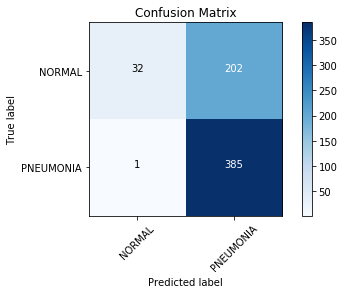

In [45]:
plot_confusion_matrix(cm, cm_plot_labels,title='Confusion Matrix')